In [75]:
import os
import time
import datetime

def get_latest_downloaded_files(directory, num_files=10):
    """
    Lists the N most recent files in a directory, sorted by modification time.

    Args:
        directory (str): The path to the directory to search.
        num_files (int): The number of files to list (default: 10).

    Returns:
        list: A list of tuples, where each tuple contains:
              (filename, file_size_bytes, last_modified_time)
              Returns an empty list if the directory doesn't exist or is empty.
    """

    if not os.path.exists(directory):
        print(f"Error: Directory '{directory}' not found.")
        return []

    try:
        files = [(f, os.path.getsize(os.path.join(directory, f)), os.path.getmtime(os.path.join(directory, f)))
                 for f in os.listdir(directory)
                 if os.path.isfile(os.path.join(directory, f))]  # Check if it's a file

        # Sort files by modification time (most recent first)
        files.sort(key=lambda x: x[2], reverse=True)

        return files[:num_files]  # Return the top N files
    except OSError as e:
        print(f"Error accessing directory: {e}")
        return []
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return []


def main():
    # Number of files to retrieve
    num_files = 5
    
    # Get the user's Downloads directory
    downloads_dir = os.path.expanduser("~\\Downloads")  # Windows-specific

    recent_files = get_latest_downloaded_files(downloads_dir, num_files=num_files)

    if recent_files:
        print(f"{num_files} Most Recent Files in Downloads:")
        for filename, size, last_modified_time in recent_files:
            # Format file size for readability
            size_kb = size / 1024
            size_mb = size_kb / 1024
            if size_mb > 1:
                file_size = f"{size_mb:.2f} MB"
            elif size_kb > 1:
                file_size = f"{size_kb:.2f} KB"
            else:
                file_size = f"{size} bytes"
            
            # Format last modified time
            formatted_time = datetime.datetime.fromtimestamp(last_modified_time).strftime('%Y-%m-%d %H:%M:%S')

            print(f"  - Name: {filename}")
            print(f"    Size: {file_size}")
            print(f"    Last Modified: {formatted_time}")
    else:
        print("No files found in the Downloads directory.")

if __name__ == "__main__":
    main()

5 Most Recent Files in Downloads:
  - Name: _df.pkl
    Size: 34.09 MB
    Last Modified: 2025-02-28 16:58:12
  - Name: OHLCV.pkl
    Size: 46.35 MB
    Last Modified: 2025-02-28 16:48:26
  - Name: download_stocks_ETFs_OHLCV_v3.ipynb
    Size: 361.86 KB
    Last Modified: 2025-02-28 16:45:16
  - Name: adj_close_prices_data.csv
    Size: 4.59 KB
    Last Modified: 2025-02-28 11:54:22
  - Name: Sortino-Ratio.zip
    Size: 17.70 KB
    Last Modified: 2025-02-27 20:59:41


In [76]:
# Retrieve pickled dataframe with symbols' OHLCV
filename = "OHLCV.pkl"

In [77]:
import os

def get_download_path(filename):
  """
  Constructs the full path to a file in the Windows Downloads directory.

  Args:
    filename: The name of the file.

  Returns:
    A string representing the absolute path to the file, or None if the
    Downloads directory cannot be found.
  """
  if os.name == 'nt':  # Check if running on Windows
    try:
      # Method 1: Using the 'USERPROFILE' environment variable
      downloads_path = os.path.join(os.environ['USERPROFILE'], 'Downloads')
      full_path = os.path.join(downloads_path, filename)
      return full_path
    except KeyError:
      # Method 2: If 'USERPROFILE' isn't set, try 'HOMEPATH'
      try:
          downloads_path = os.path.join(os.environ['HOMEDRIVE'], os.environ['HOMEPATH'], 'Downloads')
          full_path = os.path.join(downloads_path, filename)
          return full_path
      except KeyError:
        print("Error: Unable to find the Downloads directory using environment variables.")
        return None
  else:
    print("This function is designed for Windows systems.")
    return None



In [78]:
# Example usage:
full_path = get_download_path(filename)

if full_path:
  print(f"The full path to '{filename}' is: {full_path}")
else:
  print(f"Could not determine the full path to '{filename}'.")

The full path to 'OHLCV.pkl' is: C:\Users\ping\Downloads\OHLCV.pkl


In [79]:
import pandas as pd

# Load the DataFrame from the pickle file
df = pd.read_pickle(full_path)

# Display the first few rows of the DataFrame to verify
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 630966 entries, ('AAPL', Timestamp('2025-02-28 00:00:00')) to ('IBTE', Timestamp('2024-03-01 00:00:00'))
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Open       630966 non-null  float64
 1   High       630966 non-null  float64
 2   Low        630966 non-null  float64
 3   Close      630966 non-null  float64
 4   Adj Close  630966 non-null  float64
 5   Volume     630764 non-null  Int64  
 6   Adj Open   630966 non-null  float64
 7   Adj High   630966 non-null  float64
 8   Adj Low    630966 non-null  float64
dtypes: Int64(1), float64(8)
memory usage: 46.4+ MB


In [80]:
df

Open    High     Low   Close  Adj Close    Volume  \
Symbol Date                                                              
AAPL   2025-02-28  236.95  242.09  234.51  241.84     241.84  55162416   
       2025-02-27  239.41  242.46  237.06  237.30     237.30  41153600   
       2025-02-26  244.33  244.98  239.13  240.36     240.36  44433600   
       2025-02-25  248.00  250.00  244.91  247.04     247.04  48013300   
       2025-02-24  244.93  248.86  244.42  247.10     247.10  51326400   
...                   ...     ...     ...     ...        ...       ...   
IBTE   2024-03-07   23.89   23.89   23.87   23.88      22.98    348642   
       2024-03-06   23.86   23.87   23.86   23.87      22.97    399535   
       2024-03-05   23.87   23.87   23.86   23.87      22.97    572369   
       2024-03-04   23.86   23.87   23.86   23.87      22.97    316415   
       2024-03-01   23.87   23.87   23.86   23.87      22.97    458726   

                     Adj Open    Adj High     Adj Low  
Symbol Date                                            
AAPL   2025-02-28  236.950000  242.090000  234.510000  
       2025-02-27  239.410000  242.460000  237.060000  
       2025-02-26  244.330000  244.980000  239.130000  
       2025-02-25  248.000000  250.000000  244.910000  
       2025-02-24  244.930000  248.860000  244.420000  
...                       ...         ...         ...  
IBTE   2024-03-07   22.989623   22.989623   22.970377  
       2024-03-06   22.960377   22.970000   22.960377  
       2024-03-05   22.970000   22.970000   22.960377  
       2024-03-04   22.960377   22.970000   22.960377  
       2024-03-01   22.970000   22.970000   22.960377  

[630966 rows x 9 columns]

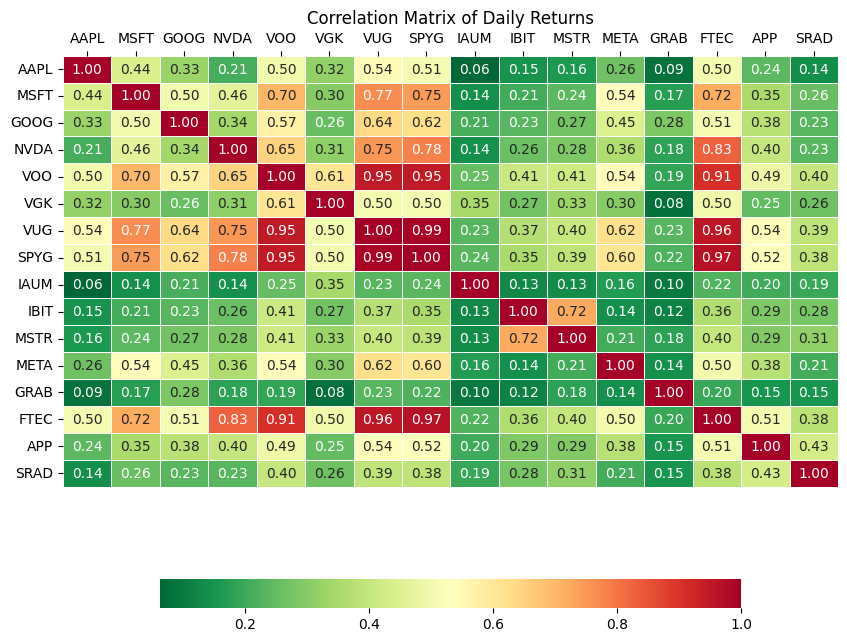

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_correlation_matrix_heatmap(df, symbols):
    """
    Calculates the correlation matrix of daily returns for a list of symbols
    from a MultiIndex DataFrame and generates a heatmap with horizontal axis labels on top
    and reversed color order (red for 1, green for 0).

    Args:
        df (pd.DataFrame): DataFrame with a MultiIndex (symbol, date) and 'Adj Close' column.
        symbols (list): A list of stock symbols to include in the correlation matrix.

    Returns:
        None: Displays the heatmap using matplotlib.  Returns None if there are errors.
    """

    # (Same error checking and correlation matrix calculation code from previous answer)
    # Check if the DataFrame is a MultiIndex DataFrame as expected.
    if not isinstance(df.index, pd.MultiIndex):
        print("Error: DataFrame must have a MultiIndex (symbol, date).")
        return None


    # Check if 'Adj Close' column exists.
    if 'Adj Close' not in df.columns:
        print("Error: 'Adj Close' column not found in DataFrame.")
        return None

    # Filter the DataFrame for the given symbols
    try:
        filtered_df = df.loc[symbols, :]
    except KeyError as e:
        print(f"Error: Symbol(s) not found in DataFrame: {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred during filtering: {e}")
        return None

    # Create a DataFrame of daily returns for Adj Close for the specified symbols
    returns_df = pd.DataFrame()
    for symbol in symbols:
        try:
            symbol_data = filtered_df.loc[symbol, 'Adj Close']  # Select the 'Adj Close' values for the current symbol
            returns_df[symbol] = symbol_data.pct_change()  # Calculate daily percentage change and add to DataFrame
        except KeyError:  # Handle cases where a symbol may be entirely missing from the data.
            print(f"Symbol {symbol} not found in the filtered DataFrame. Skipping.")
            continue # skip processing of the current symbol

    # Remove rows with NaN values (e.g., from the first day's return calculation)
    returns_df = returns_df.dropna()

    # Check if there are enough data points after removing NaNs
    if len(returns_df) < 2:  #  Need at least two data points to calculate correlation.
        print("Insufficient data points after removing NaN values.  Cannot compute correlation.")
        return None

    # Calculate the correlation matrix
    correlation_matrix = returns_df.corr()

    # Create the heatmap using seaborn
    plt.figure(figsize=(10, 8))  # Adjust figure size as needed

    # Use a red-to-green color palette (e.g., 'RdYlGn_r') - the '_r' reverses the colormap
    # and move x axis label to the top
    ax = sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn_r', fmt=".2f", linewidths=.5,
                     cbar_kws={'orientation': 'horizontal', 'shrink': .75})

    # Move x axis label to the top
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    plt.title('Correlation Matrix of Daily Returns')
    plt.show()  # Display the heatmap

    return correlation_matrix


# Example usage:
symbols = ['AAPL', 'MSFT', 'GOOG', 'NVDA', 'VOO', 'VGK', 'VUG', 'SPYG', 'IAUM', 'IBIT', 'MSTR', 'META', 'GRAB', 'FTEC', 'APP', 'SRAD']  # Example symbols
correlation_matrix = create_correlation_matrix_heatmap(df, symbols)

add correction_matrix, chunk size = 100

In [82]:
correlation_matrix

,AAPL,MSFT,GOOG,NVDA,VOO,VGK,VUG,SPYG,IAUM,IBIT,MSTR,META,GRAB,FTEC,APP,SRAD
AAPL,1.000000,0.442810,0.326359,0.211921,0.499462,0.315530,0.544743,0.508585,0.062021,0.147899,0.157596,0.264655,0.087428,0.502783,0.238087,0.136421
MSFT,0.442810,1.000000,0.500724,0.462711,0.700250,0.298492,0.768533,0.745590,0.141371,0.205829,0.239951,0.535422,0.172289,0.719209,0.352219,0.255700
GOOG,0.326359,0.500724,1.000000,0.342802,0.574289,0.255620,0.635149,0.624699,0.214128,0.231496,0.268760,0.445917,0.283286,0.506582,0.379586,0.232531
NVDA,0.211921,0.462711,0.342802,1.000000,0.650270,0.308100,0.754155,0.782410,0.144916,0.259281,0.281972,0.360901,0.180205,0.827803,0.401968,0.232747
VOO,0.499462,0.700250,0.574289,0.650270,1.000000,0.606465,0.947391,0.947771,0.249737,0.410741,0.414354,0.535482,0.188514,0.905972,0.490248,0.399776
VGK,0.315530,0.298492,0.255620,0.308100,0.606465,1.000000,0.503446,0.504438,0.346023,0.267490,0.326887,0.299096,0.076749,0.497107,0.248240,0.264796
VUG,0.544743,0.768533,0.635149,0.754155,0.947391,0.503446,1.000000,0.992378,0.231341,0.370573,0.403791,0.620171,0.232076,0.955169,0.538029,0.389652
SPYG,0.508585,0.745590,0.624699,0.782410,0.947771,0.504438,0.992378,1.000000,0.235161,0.354350,0.387576,0.604786,0.221002,0.966041,0.524930,0.384962
IAUM,0.062021,0.141371,0.214128,0.144916,0.249737,0.346023,0.231341,0.235161,1.000000,0.126228,0.132749,0.164727,0.098340,0.223524,0.202552,0.194253
IBIT,0.147899,0.205829,0.231496,0.259281,0.410741,0.267490,0.370573,0.354350,0.126228,1.000000,0.723323,0.139062,0.115307,0.359285,0.288861,0.277385


In [ ]:
import numpy as np
import pandas as pd
import pyfolio as pf
import empyrical  # Import the empyrical package

def calculate_performance_metrics(returns, risk_free_rate=0.0):
    """
    Calculates Sortino Ratio, Sharpe Ratio, and Omega Ratio using PyFolio/Empyrical.

    Args:
        returns (pd.Series or np.array):  Daily returns of the investment.
                                         Must be a Pandas Series with a DatetimeIndex.
        risk_free_rate (float):  The risk-free rate (annualized). Default is 0.0.

    Returns:
        dict: A dictionary containing the calculated ratios.
              Returns None if there is an error or the input is invalid.
    """

    try:
        # Ensure returns is a pandas Series with a DatetimeIndex.  Crucial for pyfolio.
        if not isinstance(returns, pd.Series):
            returns = pd.Series(returns)  # Convert to Series if needed
        if not isinstance(returns.index, pd.DatetimeIndex):
            raise ValueError("Returns must be a Pandas Series with a DatetimeIndex.")

        # Convert annualized risk-free rate to daily rate
        days_per_year = 252  # Standard for financial calculations
        daily_risk_free_rate = risk_free_rate / days_per_year

        # Calculate the Sharpe Ratio using empyrical (as pyfolio's is deprecated)
        sharpe_ratio = empyrical.sharpe_ratio(returns, risk_free=daily_risk_free_rate, annualization=days_per_year)

        # Calculate the Sortino Ratio using empyrical
        sortino_ratio = empyrical.sortino_ratio(returns, required_return=daily_risk_free_rate, annualization=days_per_year)

        # Calculate the Omega Ratio using empyrical
        omega_ratio = empyrical.omega_ratio(returns, risk_free=daily_risk_free_rate, annualization=days_per_year)


        return {
            "Sharpe Ratio": sharpe_ratio,
            "Sortino Ratio": sortino_ratio,
            "Omega Ratio": omega_ratio
        }

    except Exception as e:
        print(f"An error occurred: {e}")
        return None


def calculate_returns(adj_close_prices):
    """
    Calculates daily returns from adjusted close prices.

    Args:
        adj_close_prices (pd.Series): Pandas Series of adjusted close prices with DatetimeIndex.

    Returns:
        pd.Series: Pandas Series of daily returns with DatetimeIndex, sorted by date (oldest to newest).
    """
    try:
        if not isinstance(adj_close_prices, pd.Series):
            raise TypeError("Input must be a Pandas Series.")
        if not isinstance(adj_close_prices.index, pd.DatetimeIndex):
            raise ValueError("Input Series must have a DatetimeIndex.")

        # Sort the index to ensure correct return calculation (oldest to newest)
        adj_close_prices = adj_close_prices.sort_index()

        # Calculate daily returns using pct_change()
        returns = adj_close_prices.pct_change().dropna()  # Drop the first NaN value

        return returns

    except Exception as e:
        print(f"Error calculating returns: {e}")
        return None


def analyze_stock(df, ticker, risk_free_rate=0.0, output_debug_data=False):
    """
    Analyzes a single stock's performance based on its adjusted close prices.

    Args:
        df (pd.DataFrame): Pandas DataFrame containing stock data, including 'Adj Close' column.
        ticker (str): The stock ticker symbol (e.g., 'NVDA').
        risk_free_rate (float): The annualized risk-free rate. Default is 0.0.
        output_debug_data (bool): If True, print Adj Close prices and returns (default: False).
    """
    try:
        # Extract Adj Close prices for the specified ticker
        adj_close_prices = df.loc[ticker]['Adj Close']

        # Check if adj_close_prices is a Series
        if not isinstance(adj_close_prices, pd.Series):
             raise TypeError(f"Expected a Pandas Series for Adj Close prices of {ticker}. Check that {ticker} exists in the DataFrame, and that 'Adj Close' is a valid column")

        # Calculate returns
        returns_series = calculate_returns(adj_close_prices)

        if returns_series is not None:
            # Output debug data if requested
            if output_debug_data:
                print(f"--- Debug Data for {ticker} ---")
                print("\nAdj Close Prices (Dates and Values):")
                print(adj_close_prices)  #This is a Series, prints the index(dates) and values.
                print("\nReturns:")
                print(returns_series)

            # Calculate performance metrics
            performance_metrics = calculate_performance_metrics(returns_series, risk_free_rate=risk_free_rate)

            if performance_metrics:
                print(f"Performance Metrics for {ticker}:")
                for metric, value in performance_metrics.items():
                    print(f"  {metric}: {value:.4f}")
            else:
                print(f"Could not calculate performance metrics for {ticker}.")
        else:
            print(f"Failed to calculate returns for {ticker}.")

    except KeyError:
        print(f"Ticker '{ticker}' not found in DataFrame.")
    except Exception as e:
        print(f"An error occurred during analysis: {e}")


In [ ]:
# https://www.ustreasuryyieldcurve.com/

risk_free_rate = 0.04

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'

def get_unique_symbols(df):
  """
  Extracts the unique symbols from a Pandas DataFrame with a MultiIndex.

  Args:
    df: Pandas DataFrame with a MultiIndex where the first level is the symbol.

  Returns:
    A set of unique symbols.
  """
  return set(df.index.get_level_values(0))

# Example Usage (assuming you have a DataFrame named 'df'):
unique_symbols = get_unique_symbols(df)
print(unique_symbols)
print(f"Number of unique symbols: {len(unique_symbols)}")

In [ ]:
symbols = list(unique_symbols)
symbols.sort()
print(f'unique_symbols count: {len(symbols)}')
print(f'first 100 unique symbols: {symbols[:900]}')


In [ ]:
def chunk_list(lst, n):
  """Yield successive n-sized chunks from lst."""
  for i in range(0, len(lst), n):
    yield lst[i:i + n]

# Chunk the symbols list into 3 roughly equal parts
num_chunks = 3
chunk_size = len(symbols) // num_chunks
remainder = len(symbols) % num_chunks  # Distribute remainder

symbols_chunks = []
start = 0
for i in range(num_chunks):
  end = start + chunk_size + (1 if i < remainder else 0)
  symbols_chunks.append(symbols[start:end])
  start = end

# Print the lengths of the chunks to verify
for i, chunk in enumerate(symbols_chunks):
  print(f"Chunk {i+1} length: {len(chunk)}")

# Now you have symbols_chunks[0], symbols_chunks[1], and symbols_chunks[2]
# each containing a subset of the symbols

In [ ]:
for symbol in symbols_chunks[2]:
    analyze_stock(df, symbol, risk_free_rate, output_debug_data=False)
    print("\n")
# analyze_stock(df, 'NVDA', risk_free_rate, output_debug_data=False)

In [ ]:
import pandas as pd
import numpy as np

# Assuming your data is in a Pandas DataFrame called 'price_data'
# with columns as stock symbols and rows as dates

returns = price_data.pct_change().dropna()  # Calculate daily returns

correlation_matrix = returns.corr()  # Calculate the correlation matrix

print(correlation_matrix)

In [ ]:
analyze_stock(df, 'VGK', risk_free_rate, output_debug_data=False)

In [ ]:
adj_close_prices = df.loc['NVDA']['Adj Close'].sort_index()
adj_close_prices

In [ ]:
save_returns_to_csv(adj_close_prices, filename="adj_close_prices_data.csv")

In [ ]:
import numpy as np
import pandas as pd

def calculate_ratios(daily_close, risk_free_rate=0.02, debug=False):
    """
    Calculate risk-adjusted performance metrics from daily price data.
    
    Parameters:
        daily_close (pd.Series): Series of daily closing prices with DatetimeIndex
        risk_free_rate (float): Annualized risk-free rate (default: 0.02)
        debug (bool): Whether to print intermediate calculations (default: False)
        
    Returns:
        dict: Dictionary containing Sharpe, Sortino, and Omega ratios
    """
    # Validate and sort input
    if not isinstance(daily_close, pd.Series):
        raise TypeError("Input must be a pandas Series")
        
    # Sort by date (oldest first) to ensure proper return calculations
    sorted_series = daily_close.sort_index(ascending=True)
    
    # Calculate daily returns from closing prices
    returns = sorted_series.pct_change().dropna()
    if returns.empty:
        raise ValueError("Insufficient data to calculate returns")
    
    # Common parameters
    days_per_year = 252
    daily_risk_free = risk_free_rate / days_per_year
    
    # Initialize results storage
    results = {}
    debug_info = {
        'sorted_dates': sorted_series.index,
        'returns': returns
    }

    # Calculate Sharpe Ratio
    avg_daily_return = returns.mean()
    daily_std = returns.std()
    sharpe_excess = avg_daily_return - daily_risk_free
    results['Sharpe Ratio'] = (sharpe_excess / daily_std) * np.sqrt(days_per_year)
    
    # Store debug information
    debug_info.update({
        'avg_daily_return': avg_daily_return,
        'daily_std': daily_std,
        'sharpe_excess': sharpe_excess
    })

    # Calculate Sortino Ratio
    excess_returns = returns - daily_risk_free
    downside_returns = excess_returns[excess_returns < 0]
    downside_std = np.sqrt(np.sum(downside_returns**2) / len(excess_returns))
    results['Sortino Ratio'] = (excess_returns.mean() / downside_std) * np.sqrt(days_per_year)
    
    # Store debug information
    debug_info.update({
        'excess_returns': excess_returns,
        'downside_returns': downside_returns,
        'downside_std': downside_std
    })

    # Calculate Omega Ratio
    threshold = daily_risk_free
    returns_above = returns[returns > threshold]
    returns_below = returns[returns <= threshold]
    
    sum_above = (returns_above - threshold).sum()
    sum_below = (threshold - returns_below).sum()
    
    try:
        results['Omega Ratio'] = sum_above / sum_below
    except ZeroDivisionError:
        results['Omega Ratio'] = np.nan
    
    # Store debug information
    debug_info.update({
        'threshold': threshold,
        'sum_above': sum_above,
        'sum_below': sum_below
    })

    if debug:
        print("\n=== Debug Information ===")
        print(f"First 5 sorted dates: {debug_info['sorted_dates'][:5].strftime('%Y-%m-%d').tolist()}")
        print(f"Last 5 sorted dates: {debug_info['sorted_dates'][-5:].strftime('%Y-%m-%d').tolist()}")
        print(f"Number of trading days: {len(returns)}")
        print(f"\nSharpe Ratio Components:")
        print(f"Average Daily Return: {debug_info['avg_daily_return']:.6f}")
        print(f"Daily Std Dev: {debug_info['daily_std']:.6f}")
        print(f"Daily Risk-Free Rate: {daily_risk_free:.6f}")
        print(f"Sharpe Excess Return: {debug_info['sharpe_excess']:.6f}")
        
        print(f"\nSortino Ratio Components:")
        print(f"Excess Returns Mean: {excess_returns.mean():.6f}")
        print(f"Downside Returns Count: {len(debug_info['downside_returns'])}")
        print(f"Downside Std Dev: {debug_info['downside_std']:.6f}")
        
        print(f"\nOmega Ratio Components:")
        print(f"Threshold: {debug_info['threshold']:.6f}")
        print(f"Returns Above Threshold: {len(returns_above)}")
        print(f"Returns Below Threshold: {len(returns_below)}")
        print(f"Sum Above Threshold: {debug_info['sum_above']:.6f}")
        print(f"Sum Below Threshold: {debug_info['sum_below']:.6f}")
        print("\n" + "="*40 + "\n")
        
    return results

In [ ]:
adj_close_series = df.loc['NVDA']['Adj Close']
adj_close_series

In [ ]:
# Example usage:
prices = adj_close_series
ratios = calculate_ratios(prices, debug=True)
print(f"Sharpe: {ratios['Sharpe Ratio']:.4f}")
print(f"Sortino: {ratios['Sortino Ratio']:.4f}")
print(f"Omega: {ratios['Omega Ratio']:.4f}")

In [ ]:
# With debug output
# ratios = calculate_ratios(adj_close_series, risk_free_rate=0.02, debug=True)
ratios = calculate_ratios(adj_close_series, risk_free_rate=0.02, debug=False)
ratios

In [ ]:
import pandas as pd
import os

def save_returns_to_csv(returns, filename="returns.csv"):
    """
    Saves a Pandas Series of returns to a CSV file in the user's Downloads directory.

    Args:
        returns (pd.Series): The Pandas Series containing the returns data.  The index is assumed to be dates.
        filename (str, optional): The name of the CSV file to create. Defaults to "returns.csv".
    """

    # Get the user's Downloads directory
    downloads_path = os.path.join(os.path.expanduser("~"), "Downloads")

    # Construct the full file path
    file_path = os.path.join(downloads_path, filename)

    try:
        # Write the Series to a CSV file
        returns.to_csv(file_path, header=True)  # Include header for column name

        print(f"Returns data saved to: {file_path}")

    except Exception as e:
        print(f"Error saving returns to CSV: {e}")


# # Example Usage (replace with your actual returns Series)
# # Create sample data
# import numpy as np
# dates = pd.to_datetime(pd.date_range('2023-01-01', periods=252))
# returns = pd.Series(np.random.normal(0.0005, 0.01, 252), index=dates, name="Daily Return") # important to give series a name!

# # Save the data
# save_returns_to_csv(returns, filename="my_returns_data.csv")